# Data Generation -  Regression

## Gaussian distributions and linear relationships

In this section we will learn how to generate syntehtic data for benchmarking and testing of algorithms and methods.
To this end we need to understand the basics of generative models.

In a generative model a variable is generated according to a given and known distribution. In a standard setting, we work with Gaussian distributed variables.

We consider a realization of 1000 samples from standard Gaussian distributed noise $x\sim \mathcal{G}(0,1)$:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.random.randn(1000)

We inspect the density of the generated data

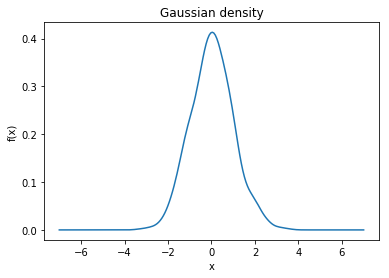

In [7]:
from scipy.stats import gaussian_kde
density = gaussian_kde(x)
xs = np.linspace(-7,7,200)

plt.plot(xs,density(xs))
plt.title('Gaussian density')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

By manipulating the data we can produce a variety of data with arbitrary distribution

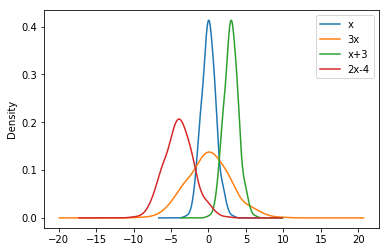

In [8]:
x1 = 3*x
x2 = x + 3
x3 = 2*x - 4

df = pd.DataFrame(np.vstack([x,x1,x2,x3]).T, columns = ['x','3x','x+3','2x-4'])
df.plot(kind="kde") 
plt.show()

We note that the algbraic manipulation of a Gaussian distributed variable is still Gaussian, with different mean and variance. This is a known property of Gaussian distributions:

$$\mathbf{x}\sim \mathcal{G}(\mu,\Sigma)\\
\mathbf{x} + \mathbf{a} \sim \mathcal{G}(\mu + \mathbf{a},\Sigma)\\
\mathbf{L} \mathbf{x} \sim \mathcal{G}(\mathbf{L} \mu , \mathbf{L}\Sigma\mathbf{L}^T)$$

This can be easily demonstrated by leveraging on the linearity property of mean and covariance functions.

For the sum:

$E(\mathbf{x} + \mathbf{a}) = E(\mathbf{x}) + E(\mathbf{a}) = \mu + \mathbf{a}$

$Cov(\mathbf{x} + \mathbf{a}) = Cov(\mathbf{x}) + Cov(\mathbf{a}) = \Sigma $

For the product:

$E(\mathbf{L}\mathbf{x}) = \mathbf{L} E(\mathbf{x}) = \mathbf{L} \mu $

$Cov(\mathbf{L} \mathbf{x}) = \mathbf{L} Cov(\mathbf{x}) \mathbf{L}^T = \mathbf{L}\Sigma\mathbf{L}^T$




$\mathbf{Exercise.}$ Can you prove the last property?

We can empirically verify this property. 

We generate 1000 i.i.d. samples, $\mathbf{x}\sim \mathcal{G}(\mathbf{0},\mbox{Id})$, from a 10-dimensional multivariate Gaussian distribution :

In [9]:
dimension = 10
samples = 1000

x = np.random.randn(dimension*samples).reshape(dimension,samples)
print(x.shape)

(10, 1000)


We can compute mean and covariance of the samples:

The sample mean of the data is: 
[-0.0029831   0.04186263 -0.00115395 -0.02105516  0.03427924  0.02037179
 -0.02801055 -0.00854418 -0.02557447 -0.01349302]

 The sample covariance is the following: 



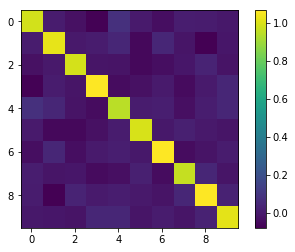

In [10]:
sample_mean = np.mean(x,1)

print('The sample mean of the data is: \n' + str(sample_mean))
print('\n The sample covariance is the following: \n')
plt.imshow(np.cov(x))
plt.colorbar()
plt.show()

Now we generate a random 10-dimensional vector with integer values, and we transform the original sample: 

In [11]:
a = np.random.randint(0,100,10)
print('The constant term to add to our sample is : \n' + str(a))

# Adding the constant term 
## careful about Python broadcasting 
x1 = (a + x.T).T

The constant term to add to our sample is : 
[28 98 21 33 99 38 57 65 71 45]


Let's verify the properties of the transformed variables:

The sample mean of the translated data is: 
[ 27.9970169   98.04186263  20.99884605  32.97894484  99.03427924
  38.02037179  56.97198945  64.99145582  70.97442553  44.98650698]

 The sample covariance is the following: 



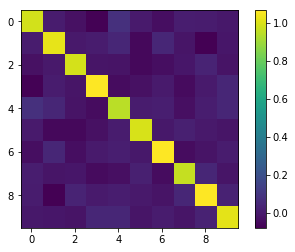

In [12]:
print('The sample mean of the translated data is: \n' + str(np.mean(x1,1)))

print('\n The sample covariance is the following: \n')

plt.imshow(np.cov(x1))
plt.colorbar()
plt.show()

We now define a linear transformation $\mathbf{L}$ with integer entries between 0 and 100, and we transform the initial sample by right multiplication:

In [13]:
# Multiplication matrix
L = np.random.randint(0,100,100).reshape(10,10)
print('The linear transformation matrix: \n' + str(L))

#Performing the multiplication
x2 = np.dot(L,x)

The linear transformation matrix: 
[[ 1 59 28 40 19 94 75  3 38 63]
 [ 3  4 13 65 21 61 48 86 58 67]
 [70 49 39 62 40  9 97 29  3 52]
 [60 76 42 13 60  1 54  2 66 16]
 [12 85 77 72 10 81 26 65 42  8]
 [47 20 32  2 90 10 45 81 20 21]
 [21 71 10 33 74 69  9 24 90 95]
 [91 78 84 93 19 58 60 85 29  7]
 [ 9 58 38 38 19 54 35 43 89  2]
 [50 30 70 38 57 44 16 76 59  1]]


Let's verify again the properties of this new sample:

The sample mean of the transformed data is: 
[ 0.21033517 -3.72919937 -1.69662104  1.32405578  1.44488971  1.15946403
  2.10486486 -0.47136842 -0.34226231  0.45621356]

 The sample covariance is the following: 



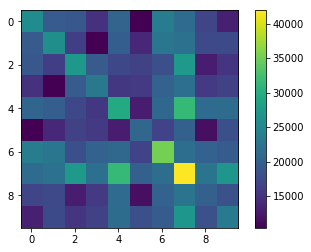

In [14]:
print('The sample mean of the transformed data is: \n' + str(np.mean(x2,1)))

print('\n The sample covariance is the following: \n')

plt.imshow(np.cov(x2))
plt.colorbar()
plt.show()


We note that the covariance is equivalent to the product $\mathbf{L}\mathbf{L}^T$:

Applying L to the mean of x gives: 
[ 0.21033517 -3.72919937 -1.69662104  1.32405578  1.44488971  1.15946403
  2.10486486 -0.47136842 -0.34226231  0.45621356]

 The matrix product LL^T is : 



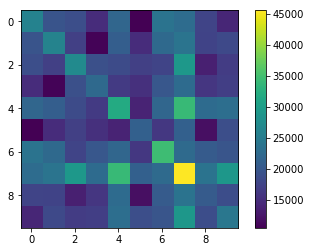

In [15]:
result = np.dot(L,sample_mean)

print('Applying L to the mean of x gives: \n' + str(np.dot(L,sample_mean)))

print('\n The matrix product LL^T is : \n')

plt.imshow(np.dot(L,L.T))
plt.colorbar()
plt.show()

$\textbf{Exercise.}$ What is the distribution of the data $ \mathbf{y} = \mathbf{L}\mathbf{x} + \mathbf{a}$? Verify empirically the properties of this data.

The sample mean of Lx+a is: 
[  28.21033517   94.27080063   19.30337896   34.32405578  100.44488971
   39.15946403   59.10486486   64.52863158   70.65773769   45.45621356]

 The covariance of Lx+a is: 



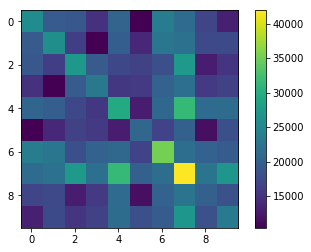

 L \mu + a = 
[  28.21033517   94.27080063   19.30337896   34.32405578  100.44488971
   39.15946403   59.10486486   64.52863158   70.65773769   45.45621356]

 The matrix product LL^T is : 



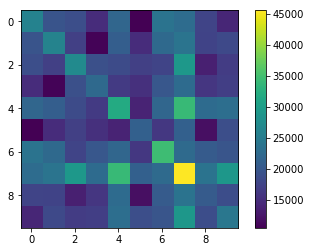

In [16]:
x3 = (np.dot(L,x).T + a ).T
print('The sample mean of Lx+a is: \n' + str(np.mean(x3,1)))
print('\n The covariance of Lx+a is: \n' )
plt.imshow(np.cov(x3))
plt.colorbar()
plt.show()

Lmu = np.dot(L,sample_mean)

print(' L \mu + a = \n' + str(Lmu + a))
print('\n The matrix product LL^T is : \n')

plt.imshow(np.dot(L,L.T))
plt.colorbar()
plt.show()


## Generating data with linear relationships

By taking advantage of the properties of the Gaussian distribution, we can generate multi-dimensional data with known linearity properties. Therefore, we can generate (linear) data that can be used to benchmark regression methods.

We start by generating our 1-dimensional samples $x\sim \mathcal{N}(0,1)$, and we transform acording to a known pre-defined linear transformation $y = a x + b$: 

In [17]:
x = np.random.randn(50)
a = 5
b = -30

y = a * x + b

The newly generated variables $y$ is linearly related to $x$:

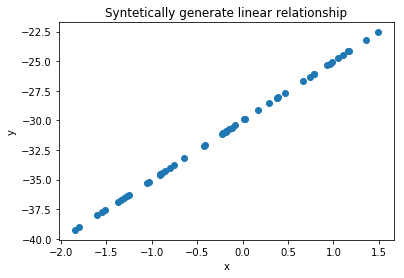

In [18]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Syntetically generate linear relationship')
plt.show()

To mke this new dataset $(x,y)$ more realistic, we can perturb $y$ with Gaussian noise:

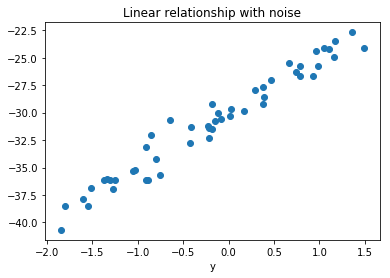

In [19]:
y_noise = y + np.random.randn(len(y))
plt.scatter(x,y_noise)
plt.xlabel('x')
plt.xlabel('y')
plt.title('Linear relationship with noise')
plt.show()

Note that the noise level can be increased to control the level of perturbation of the relationship between $x$ and $y$. To modify the noise level we use the usual linearity properties of the Gaussian distribution:

In [20]:
noise_level = 5
noise = np.random.randn(len(y)) * noise_level

print (np.std(noise,0))

4.68395119246


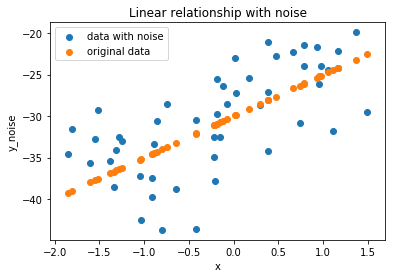

In [21]:
y_noise = y + noise

plt.scatter(x,y_noise, label = 'data with noise')
plt.scatter(x,y, label = 'original data')
plt.xlabel('x')
plt.ylabel('y_noise')
plt.legend()
plt.title('Linear relationship with noise')
plt.show()

## Simple model training on simulated data

We use our synthetic data for model benchmarking on a univariate regression problem.

In [22]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(x.reshape(-1,1),y_noise)

print('The estimated regression parameters are: \n')
print('Intercept: ' + str(regression.intercept_) + '\n')
print('Slope: ' + str(regression.coef_) + '\n')

estimated_params = np.array([regression.intercept_, regression.coef_])
real_parameters = np.array([b,a])


est_rmse = np.sqrt(np.mean((estimated_params - real_parameters)**2))

print('The root mean squared estimation error for the parameters is: ' + str(est_rmse))

The estimated regression parameters are: 

Intercept: -29.616857366

Slope: [ 4.3841399]

The root mean squared estimation error for the parameters is: 0.512875197316


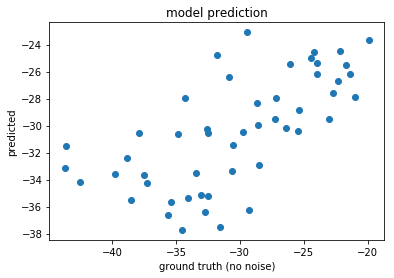

In [23]:
prediction = x * estimated_params[1] + estimated_params[0]
plt.scatter(y_noise, prediction)
plt.xlabel('ground truth (no noise)')
plt.ylabel('predicted')
plt.title('model prediction')
plt.show()

The package seaborn (https://seaborn.pydata.org) is useful for fitting and plotting regression models:

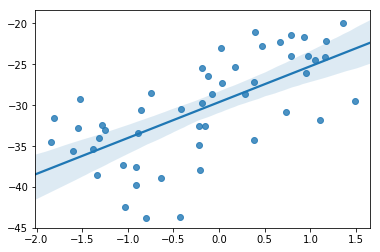

In [24]:
import seaborn as sns
sns.regplot(x=x, y=y_noise)
plt.show()

### The multivariate case

The same procedure can be repeated with multivariate data, and with arbitrary sample size. 
In this case our generative model takes the form:

$$ \mathbf{y} = \mathbf{A} \mathbf{x} + \mathbf{b},$$

where $\mathbf{A}$ is a transformation matrix.

The linear transformation is : 
[[-3  2 -3]
 [-2  4  4]]
The constant term is : 
[-19   6]


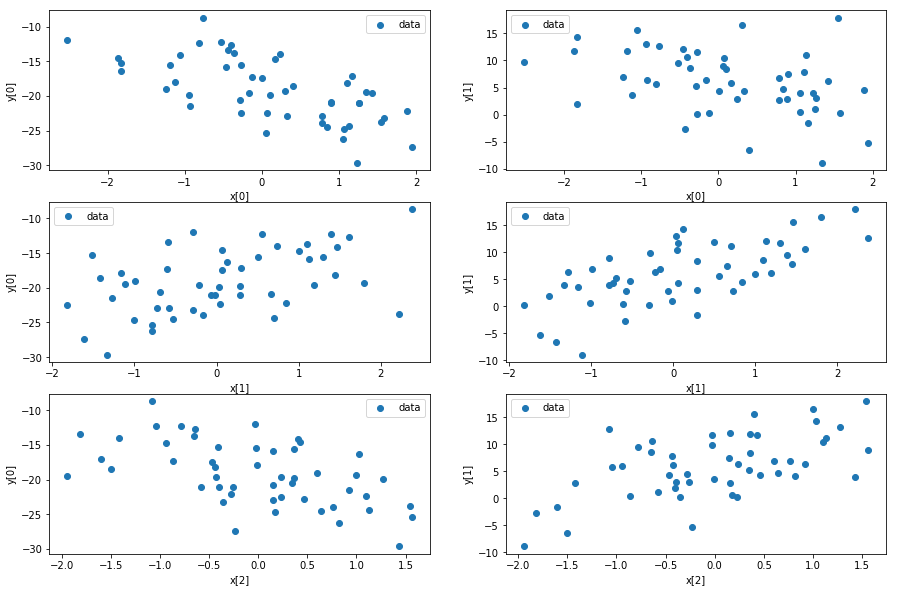

In [30]:
n_input_dimensions = 3
n_ouput_dimensions = 2
n_samples = 50

x = np.random.randn(n_input_dimensions*n_samples).reshape(n_input_dimensions,n_samples)

A = np.random.randint(-5,5,n_input_dimensions*n_ouput_dimensions).reshape(n_ouput_dimensions,n_input_dimensions)
b = np.random.randint(-20,20,n_ouput_dimensions)

print('The linear transformation is : \n' + str(A))
print('The constant term is : \n' + str(b))

y = (np.dot(A,x).T + b).T

noise_level = 3
noise = noise_level * np.random.randn(n_output_dimensions*n_samples).reshape(n_ouput_dimensions,n_samples)

y_noise = y + noise

def pairwise_plot(x,y):
    n_input_dimensions = x.shape[0]
    n_output_dimensions = y.shape[0]
    plt.figure(figsize=(15,10))
    for i in range(n_input_dimensions):
        for j in range(n_output_dimensions):
            plt.subplot(n_input_dimensions, n_output_dimensions, i*n_output_dimensions + j + 1)
            plt.scatter(x[i,:],y[j,:],marker = 'o', label = 'data')
            plt.xlabel('x[' + str(i) + ']')
            plt.ylabel('y[' + str(j) + ']')
            plt.legend()
    plt.show()


pairwise_plot(x,y)    

We are ready to use the generated data for testing a simple linear model:

In [31]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(x.T,y_noise.T)

print('The estimated coefficient matrix is \n:' + str(regression.coef_))
print('The estimated multivariate intercept is \n: ' + str(regression.intercept_))

The estimated coefficient matrix is 
:[[-2.89138009  2.25576173 -3.56515566]
 [-2.07330099  3.86219749  3.77370589]]
The estimated multivariate intercept is 
: [-18.56488373   5.53938864]


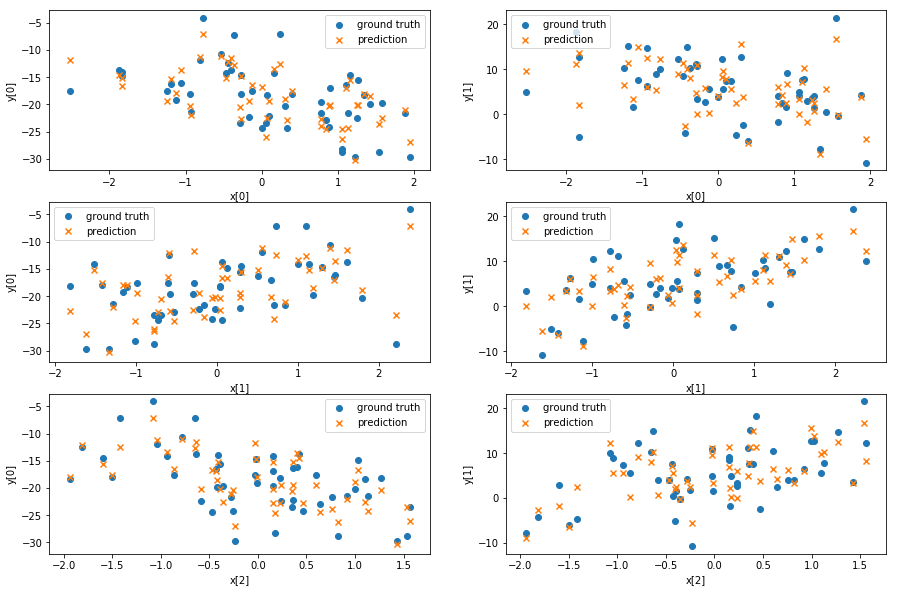

In [32]:
prediction = regression.predict(x.T)

n_input_dimensions = x.shape[0]
n_output_dimensions = y.shape[0]
plt.figure(figsize=(15,10))
for i in range(n_input_dimensions):
    for j in range(n_ouput_dimensions):
        plt.subplot(n_input_dimensions, n_ouput_dimensions, i*n_output_dimensions + j + 1)
        plt.scatter(x[i,:],y_noise[j,:],marker = 'o', label = 'ground truth')
        plt.scatter(x[i,:],prediction[:,j],marker = 'x', label = 'prediction')
        plt.xlabel('x[' + str(i) + ']')
        plt.ylabel('y[' + str(j) + ']')
        plt.legend()
plt.show()


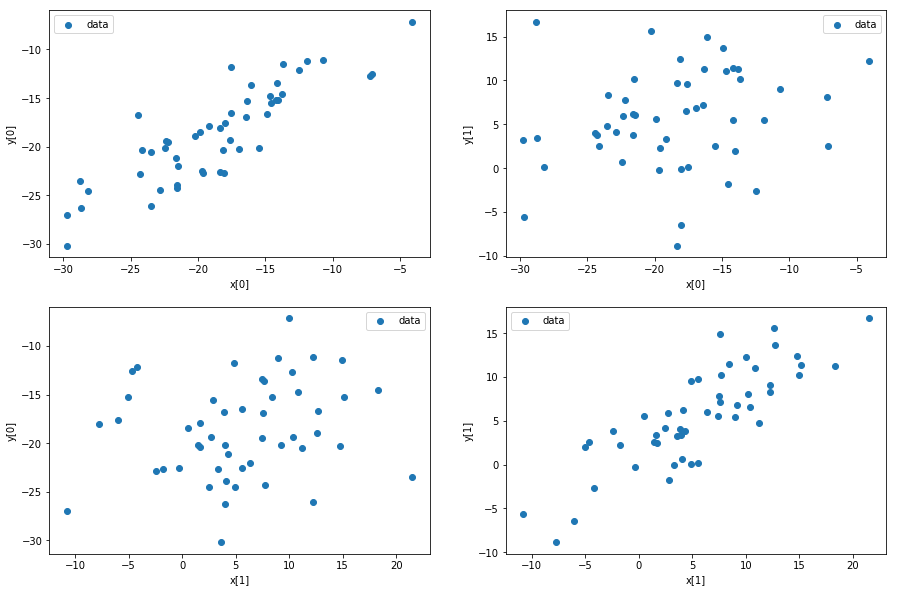

In [33]:
pairwise_plot(y_noise,prediction.T)

## Exercise

Explore difference combination of parameters and noise to generate the data. Use this data to benchmark the linear model and compare the different results.  

## Generating data with non-linear relationships

Non-linear relationship can be defined in a similar way as with the linear case. 
However, in this case need to deal with more complex transformations of the input data to introduce non-linear behaviours.  

A classical example of non-linear activation function is the negative squared exponential:

$$ f(x,c,\lambda) = \exp\left(-\frac{(x - c)^2}{\lambda}\right) $$

Let's inspect the behaviour of this function:

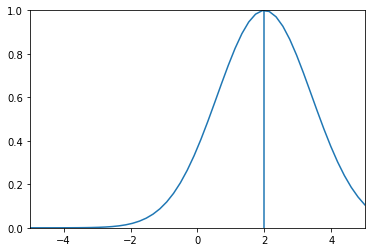

In [34]:

def neg_sq_exp(x, c, l):
    return np.exp(-(x-c)**2/l)

def plot_neg_sq_exp(c, l):
    x = np.linspace(-5,5)
    plt.axvline(x=c)
    plt.plot(x,neg_sq_exp(x, c, l))
    plt.ylim([0,1])
    plt.xlim([-5,5])
    plt.show()


c = 2
l = 4

plot_neg_sq_exp(c,l)


We use this function to define a family of interpolators at given control points $c_1, \ldots, c_p$:

$$ \{f(x,c_i,\lambda)\}_{i=1}^{p}$$

In particular we can transform the input data $x$ to create non-linearly related output: 

$$ y = \sum_{i=1}^p w_i f(x,c_i,\lambda) $$

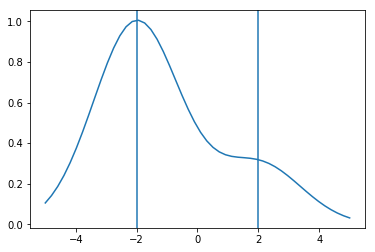

In [35]:
x = np.linspace(-5,5)

c = np.array([-2, 2])
w = np.array([1,0.3])

l = 4

def interpolator(x,c,l,w):
    return np.sum([w[i] * neg_sq_exp(x,c[i],l) for i in range(len(c))],0)


y  = interpolator(x,c,l,w)

plt.plot(x,y)
[plt.axvline(x=i) for i in c] 
plt.show()


Let's apply this non-linear regression benchmark.
We first generate our data:

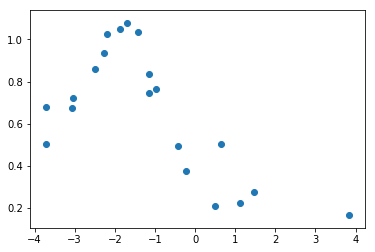

In [55]:
N_samples = 20

# Generate Gaussian data with std = 4 and mean -1
x_bench_non_lin = 2* np.random.randn(N_samples) - 1

# Non-linear tranformation
y_bench_non_lin = interpolator(x_bench_non_lin,c,l,w)

# Adding noise
noise_level = 0.1
noise = noise_level * np.random.randn(N_samples)

y_noise_bench_non_lin = y_bench_non_lin + noise

plt.scatter(x_bench_non_lin,y_noise_bench_non_lin)
plt.show()


We now fit a standard linear regression model:

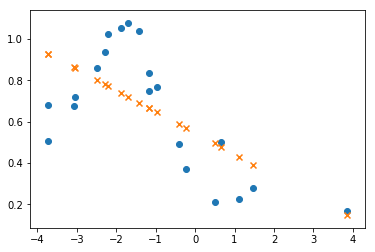

In [56]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_bench_non_lin.reshape(-1,1),y_noise_bench_non_lin)
lin_prediction = lin_reg.predict(x_bench_non_lin.reshape(-1,1))
plt.scatter(x_bench_non_lin,y_noise_bench_non_lin,marker = 'o', label = 'ground truth')
plt.scatter(x_bench_non_lin,lin_prediction,marker = 'x', label = 'linear prediction')
plt.show()


In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(2)
poly5 = PolynomialFeatures(5)

x_poly2 = poly2.fit_transform(x_bench_non_lin.reshape(-1,1))

We now apply a polynomial regression model:

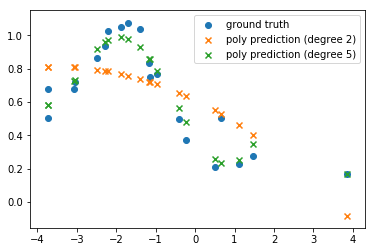

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(2)
poly5 = PolynomialFeatures(5)

x_poly2 = poly2.fit_transform(x_bench_non_lin.reshape(-1,1))
x_poly5 = poly5.fit_transform(x_bench_non_lin.reshape(-1,1))

reg_poly2 = linear_model.LinearRegression()
reg_poly2.fit(x_poly2,y_noise_bench_non_lin)

reg_poly5 = linear_model.LinearRegression()
reg_poly5.fit(x_poly5,y_noise_bench_non_lin)

poly_2_prediction = reg_poly2.predict(x_poly2)
poly_5_prediction = reg_poly5.predict(x_poly5)

plt.scatter(x_bench_non_lin,y_noise_bench_non_lin,marker = 'o', label = 'ground truth')
plt.scatter(x_bench_non_lin,poly_2_prediction, marker = 'x', label = 'poly prediction (degree 2)')
plt.scatter(x_bench_non_lin,poly_5_prediction, marker = 'x', label = 'poly prediction (degree 5)')
plt.legend()
plt.show()



We note that tge polynomial prediction of higher degree seems to provide better predictions. We should be careful about this result, as we will see in the next sections.

## Multivariate non-linear data generator

As for the linear case, we can generalize this relationship to any dimension and include noise.
We can put together what we have seen so far to generate more complex benchmark:

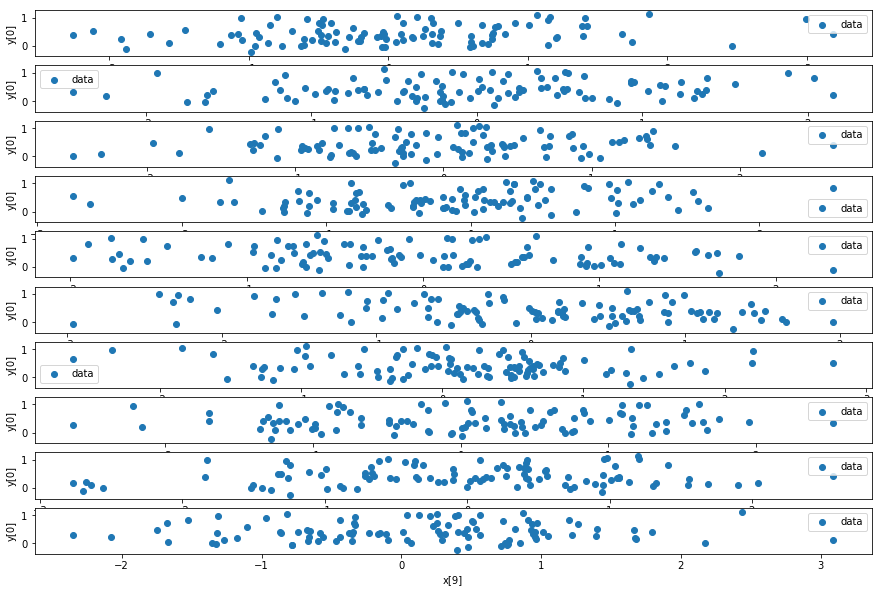

In [59]:
# Generate multivariate data

n_input_dimension = 10
n_output_dimension = 1
n_samples = 100
noise_level = 0.1

# Generate input data with dimension n_input_dimension

x = np.random.randn(n_samples*n_input_dimension).reshape(n_input_dimension,n_samples)

# The coefficient matrix transforms the input data to a 1 dimensional space

A = np.random.randn(n_input_dimension*n_output_dimension).reshape(n_output_dimension,n_input_dimension)

transf_x = np.dot(A,x)

# We non-linearly transform the transformed input data according to our interpolator

y = interpolator(transf_x,c,l,w)

# We generate some noise and add to y

noise = np.random.randn(n_samples).reshape(n_samples,1) * noise_level

y_noise = (y.T  + noise).T

pairwise_plot(x,y_noise)

When applied to this kind of data the linear regression model will give a rather different model results:

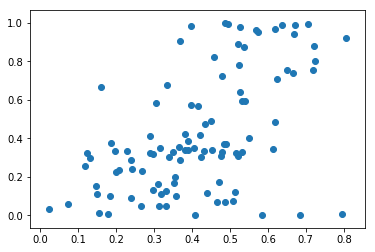

In [60]:
regression.fit(x.T,y_noise.T)
preds = regression.predict(x.T)

plt.scatter(preds,y)
plt.show()

## Goodness of fit and accuracy metrics in regression

The goodness of fit is a statistical measure describing how well a model fits the observations. There are several measures that we can use to assess the discrepancy between predictions and observations. A classical measure is the explained variance, denoted as $\mathbf{R}^2$. The $\mathbf{R}^2$ coefficient is defined as the ratio between the observed variance and the variance explained by the model:

$$ \mathbf{R}^2 = \frac{SS_{expl}}{SS_{tot}}. $$

To compute this quantity we need first to compute the average $\bar{y}$ of the target points $y_i$: $\bar{y} = \frac{1}{n}\sum_i y_i$. We can then compute the deviations of the data from the average:  $SS_{tot} = \sum_i(y_i-\bar{y})^2$. 

Given the predictions $\hat{y_i} = ax_i + b$, the explaied sum of squares is instead computed as the deviation of the prediction from the average: $SS_{expl} = \sum_i(\hat{y_i}-\bar{y})^2$. 

The $ \mathbf{R}^2$ coefficient is therefore:
$$  \mathbf{R}^2 = \frac{\sum_i(\hat{y_i}-\bar{y})^2}{\sum_i(y_i-\bar{y})^2}.$$


We can also define the variance of the residuals $ SS_{res} = \sum_i({y_i}-\hat{y_i})^2$.
It can be shown that the $\mathbf{R}^2$ can be also computed as:

$$  \mathbf{R}^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_i({y_i}-\hat{y_i})^2}{\sum_i(y_i-\bar{y})^2}.$$




Useful metrics for computing the prediction error are 
- root mean square error (RMSE):

$$ RMSE = \sqrt{\frac{1}{n}\sum_i(\hat{y_i}-{y_i})^2}$$

- mean absolute error (MAE):

$$ MAE = \frac{1}{n}\sum_i |\hat{y_i}-{y_i}| $$

Let's evaluate these scores on our non-linear regression problem.

$\mathbf{Exercise.}$ Compute the $\mathbf{R}^2$ coefficient of our previous non-linear linear regression problem, for the linear and polynomials models.

In [61]:
def R2(y_real,y_pred):
    y_avg = np.mean(y_real)
    SS_tot = np.sum((y_real - y_avg)**2)
    SS_expl = np.sum(( y_pred - y_avg)**2)
    SS_res = np.sum((y_real - y_pred)**2)
    return SS_expl/SS_tot, 1 - SS_res/SS_tot

## linear model
print('-- Linear model --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_bench_non_lin, lin_prediction)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_bench_non_lin, lin_prediction)[1])) 

## polynomial degree 2
print('\n-- Polynomial degree 2 --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_bench_non_lin, poly_2_prediction)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_bench_non_lin, poly_2_prediction)[1])) 

## polynomial degree 5
print('\n-- Polynomial degree 5 --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_bench_non_lin, poly_5_prediction)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_bench_non_lin, poly_5_prediction)[0])) 





-- Linear model --

The R2 score SS_expl/SS_tot is :0.434561674673
The R2 score 1-SS_res/SS_tot is :0.434561674673

-- Polynomial degree 2 --

The R2 score SS_expl/SS_tot is :0.50436387258
The R2 score 1-SS_res/SS_tot is :0.50436387258

-- Polynomial degree 5 --

The R2 score SS_expl/SS_tot is :0.907962037007
The R2 score 1-SS_res/SS_tot is :0.907962037007


In [62]:
def RMSE(y_real,y_pred):
    return np.sqrt(np.mean(((y_pred - y_real)**2)))

def MAE(y_real,y_pred):
    return np.mean(np.abs((y_pred - y_real)))

print('-- Linear model --\n')
print('The RMSE is ' + str(RMSE(y_noise_bench_non_lin, lin_prediction)))
print('The MAE is ' + str(MAE(y_noise_bench_non_lin, lin_prediction)))

print('-- Polynomial degree 2 --\n')
print('The RMSE is ' + str(RMSE(y_noise_bench_non_lin, poly_2_prediction)))
print('The MAE is ' + str(MAE(y_noise_bench_non_lin, poly_2_prediction)))

print('-- Polynomial degree 5 --\n')
print('The RMSE is ' + str(RMSE(y_noise_bench_non_lin, poly_5_prediction)))
print('The MAE is ' + str(MAE(y_noise_bench_non_lin, poly_5_prediction)))

-- Linear model --

The RMSE is 0.220080417438
The MAE is 0.189818797775
-- Polynomial degree 2 --

The RMSE is 0.206048879831
The MAE is 0.180103153965
-- Polynomial degree 5 --

The RMSE is 0.0887916812726
The MAE is 0.0686844120185


$\mathbf{Exercise.}$ Generate some testing data according to the non-linear model seen before. What happens when computing the $\mathbf{R}^2$, RMSE and MAE coefficients with respect to testing data?

We note the the $\mathbf{R}^2$ on independent testing data can be negative, and also that:

$$ \frac{SS_{expl}}{SS_{tot}} \neq  1 - \frac{SS_{res}}{SS_{tot}} $$



In [63]:
N_testing_samples = 20

# Generate Gaussian testing data with std = 4 and mean -1
x_test_non_lin = 2* np.random.randn(N_testing_samples) - 1

# Evaluating the predictions
#linear model
linear_pred_test = lin_reg.predict(x_test_non_lin.reshape(-1,1))

#polynomial models
x_test_poly2 = poly2.fit_transform(x_test_non_lin.reshape(-1,1))
x_test_poly5 = poly5.fit_transform(x_test_non_lin.reshape(-1,1))

poly2_pred_test = reg_poly2.predict(x_test_poly2)
poly5_pred_test = reg_poly5.predict(x_test_poly5)

# Assessing the ground truth target
# Non-linear tranformation
y_test_non_lin = interpolator(x_test_non_lin,c,l,w)

# Adding noise
noise_level = 0.1
noise = noise_level * np.random.randn(N_samples)

# ground truth to be predicted
y_noise_test_non_lin = y_test_non_lin + noise

print('--- Testing data ---\n')

## linear model
print('-- Linear model --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_test_non_lin, linear_pred_test)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_test_non_lin, linear_pred_test)[1])) 
print('The RMSE is ' + str(RMSE(y_noise_test_non_lin, linear_pred_test)))
print('The MAE is ' + str(MAE(y_noise_test_non_lin, linear_pred_test)))


## polynomial degree 2
print('\n-- Polynomial degree 2 --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_test_non_lin, poly2_pred_test)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_test_non_lin, poly2_pred_test)[1])) 
print('The RMSE is ' + str(RMSE(y_noise_test_non_lin, poly2_pred_test)))
print('The MAE is ' + str(MAE(y_noise_test_non_lin, poly2_pred_test)))


## polynomial degree 5
print('\n-- Polynomial degree 5 --\n')
print('The R2 score SS_expl/SS_tot is :' + str(R2(y_noise_test_non_lin, poly5_pred_test)[0])) 
print('The R2 score 1-SS_res/SS_tot is :' + str(R2(y_noise_test_non_lin, poly5_pred_test)[0])) 
print('The RMSE is ' + str(RMSE(y_noise_test_non_lin, poly5_pred_test)))
print('The MAE is ' + str(MAE(y_noise_test_non_lin, poly5_pred_test)))





--- Testing data ---

-- Linear model --

The R2 score SS_expl/SS_tot is :0.62741086099
The R2 score 1-SS_res/SS_tot is :-0.545399193668
The RMSE is 0.327338331431
The MAE is 0.200911436377

-- Polynomial degree 2 --

The R2 score SS_expl/SS_tot is :0.235408291077
The R2 score 1-SS_res/SS_tot is :0.373353164417
The RMSE is 0.208443304311
The MAE is 0.158326229907

-- Polynomial degree 5 --

The R2 score SS_expl/SS_tot is :416.191780093
The R2 score 1-SS_res/SS_tot is :416.191780093
The RMSE is 5.4887479498
The MAE is 1.32386092025


In [64]:
## Equivalent sklearn code
from sklearn.metrics import mean_absolute_error, mean_squared_error

sklearn_MSE = mean_squared_error(y_noise_test_non_lin, poly2_pred_test)
sklearn_MAE = mean_absolute_error(y_noise_test_non_lin, poly2_pred_test)

print('-- sklearn -- \nThe RMSE is ' + str(np.sqrt(sklearn_MSE)))
print('The MAE is ' + str(sklearn_MAE))


-- sklearn -- 
The RMSE is 0.208443304311
The MAE is 0.158326229907


# Data Generation - Classification

We now move to the generation of syntetic for classification problems.
In a classification problem we want to predict labels from a given set of features. Labels are represented by a discrete set $(c_0,c_1,\ldots,c_k)$ while the features can be of any dimension and take arbitrary values. 

A simple generative model for this kind of data is the Gaussian mixture one. In such a setting, the data $z$ associated to a label $c_i$ are assumed to be Gaussian distributed around a center point $\mu_i$, and with a given covariance $\Sigma_i$ (in what follows we will assume identity covariance $\Sigma_i = \mbox{Id}$). In notation:

$$ p(z | c_i) \sim \mathcal{N}(\mu_i, \Sigma_i)$$


We can assume that the centers $\mu_i$ correspond to the vertices of a k-dimensional hypercube with a given side length. For example, in the 2 dimensional case, we can generate the following data:

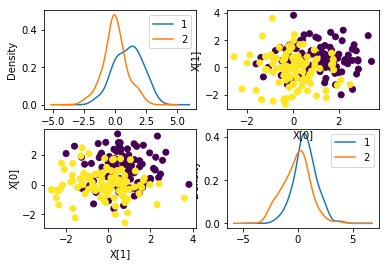

In [65]:
import itertools
from pandas.plotting import scatter_matrix

# 2-dimensional data
n_dim = 2
side_length = 1
n_samples = 100

x_class_1 = np.random.randn(n_dim*n_samples).reshape(n_samples, n_dim)
x_class_2 = np.random.randn(n_dim*n_samples).reshape(n_samples, n_dim)

X_data  = np.vstack([np.array([side_length,side_length]) + x_class_1, np.array([0,0]) + x_class_2])

y_data = np.hstack([np.repeat(1,n_samples),np.repeat(2,n_samples)])

def cluster_plot(X,y):
    n_input_dimensions = X.shape[1]
    n_output_dimensions = 1
    plt.figure(figsize=(15,10))
    fig, axes = plt.subplots(nrows = n_input_dimensions, ncols = n_input_dimensions)
    labels = np.unique(y)
    for i in range(n_input_dimensions):
        for j in range(n_input_dimensions):           
            if i==j:
                X_lab = [X[np.where(y==c)[0],i] for c in labels]
                df = pd.DataFrame(X_lab)
                df = df.transpose()
                df.columns = [str(c) for c in labels]               
                df.plot(ax=axes[i,i], kind="kde")   
            else:
                plt.subplot(n_input_dimensions, n_input_dimensions, i*n_input_dimensions + j + 1)
                plt.scatter(X[:,i],X[:,j], c = y, marker = 'o')
                plt.xlabel('X[' + str(i) + ']')
                plt.ylabel('X[' + str(j) + ']')
                plt.legend()
    plt.show()

#df = pd.DataFrame(X_data)
#scatter_matrix(df, diagonal='kde', c = y_data)
#plt.show()
cluster_plot(X_data,y_data)

$\mathbf{Exercise.}$ How would you make the classification task more difficult with more separated clusters?

$\mathbf{Exercise.}$ Can you generate multiclass data distributed on 3 clusters?

This data can be used to train a classifier, such as k-nearest neighbourhoods. In scikit-learn it would be as simple as:

In [66]:
from sklearn.neighbors import KNeighborsClassifier

kn =  KNeighborsClassifier(3)

kn.fit(X_data,y_data)

prediction = kn.predict(X_data)

This kind of data can be generated in an automated fashion by using the scikit-learn command $\textit{make_classification}$:

In [67]:
from sklearn.datasets import make_classification

In [70]:
X, y = make_classification(n_samples=200, weights = [.5,.5], n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

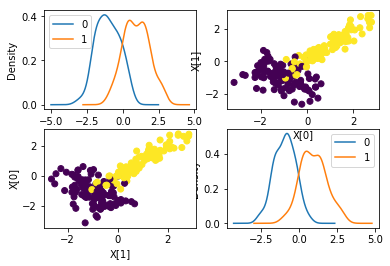

In [71]:
cluster_plot(X,y)

## Performance metrics in classification



We can now inspect the accuracy of the prediction with respect to the generated ground truth:

In [72]:
# True positives (data = 1 & pred = 1)
true_pos = np.sum([prediction[i]==1 and y_data[i]==1 for i in range(len(prediction))])

# True negatives (data = 2 & pred = 2)
true_neg = np.sum([prediction[i]==2 and y_data[i]==2 for i in range(len(prediction))])

# False positives (data = 2 & pred = 1)
false_pos = np.sum([prediction[i]==1 and y_data[i]==2 for i in range(len(prediction))])

# False negatives (data = 1 & pred = 2)
false_neg = np.sum([prediction[i]==2 and y_data[i]==1 for i in range(len(prediction))])

confusion_matrix = np.array([[true_pos,false_pos],[false_neg,true_neg]])

print('The confusion matrix: \n' + str(confusion_matrix))

The confusion matrix: 
[[80 21]
 [20 79]]


From the confusion matrix we can compute a number of metrics to quantify the prediction performance:

- Accuracy: quantifies the overall number of correct predictions
$$ ACC = \frac{\mbox{True Positives} + \mbox{True negatives}}{\mbox{Total sample size}}$$


- Precision (positive predictive value): quantifies the number of correct predictions among all the positive predictions
$$ PRECISION = \frac{\mbox{True Positives}}{\mbox{True Positives} + \mbox{False Positives} } $$


- Recall (true positive rate, or sensitivity): quantifies the number of correct predictions among all the positive data
$$ RECALL = \frac{\mbox{True Positives}}{\mbox{True Positives} + \mbox{False Negatives} } $$


- Specificity (true negative rate): quantifies the number of correct predictions among all the negative data
$$ SPEC = \frac{\mbox{True Negatives}}{\mbox{False Positives} + \mbox{True Negatives} } $$

More information about the metrics can be found on Wikipedia (https://en.wikipedia.org/wiki/Confusion_matrix), or in the sklearn page (https://scikit-learn.org/stable/modules/model_evaluation.html)

In [73]:
ACC = (true_pos +  true_neg)/np.sum(confusion_matrix)

PRECISION = (true_pos)/(confusion_matrix[0,0] + confusion_matrix[0,1])

SENSITIVITY = (true_pos)/(confusion_matrix[0,0] + confusion_matrix[1,0])

SPECIFICITY = (true_neg)/(confusion_matrix[0,1] + confusion_matrix[1,1])

print('The accuracy is : ' +str(ACC))
print('The precision is : ' +str(PRECISION))
print('The sensitivity is : ' +str(SENSITIVITY))
print('The specificity is : ' +str(SPECIFICITY))



The accuracy is : 0.795
The precision is : 0.792079207921
The sensitivity is : 0.8
The specificity is : 0.79


In [74]:
## from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('-- sklearn metrics --\n')
print('accuracy: ' + str(accuracy_score(y_data,prediction)))
print('precision: ' + str(precision_score(y_data,prediction)))
print('sensitivity: ' + str(recall_score(y_data,prediction)))

-- sklearn metrics --

accuracy: 0.795
precision: 0.792079207921
sensitivity: 0.8
